In [3]:

import requests
import pandas as pd
from datetime import datetime
import time
#import prophet
from prophet import Prophet
import csv 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader.data as web


In [4]:
import yfinance as yf

In [5]:
yf.pdr_override()

In [6]:
from pylab import rcParams

In [7]:
rcParams['figure.figsize'] =  15 , 6

In [8]:
ativos = ['PETR4.SA','ITUB4.SA','BBDC4.SA']

In [9]:
preço = web.get_data_yahoo(f'{ativos[0]}')

[*********************100%***********************]  1 of 1 completed


In [10]:
print(preço)

                 Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2000-01-03   5.875000   5.875000   5.875000   5.875000   2.139587  35389440000
2000-01-04   5.550000   5.550000   5.550000   5.550000   2.021227  28861440000
2000-01-05   5.494000   5.494000   5.494000   5.494000   2.000833  43033600000
2000-01-06   5.475000   5.475000   5.475000   5.475000   1.993914  34055680000
2000-01-07   5.500000   5.500000   5.500000   5.500000   2.003018  20912640000
...               ...        ...        ...        ...        ...          ...
2022-08-10  37.650002  37.650002  36.610001  37.110001  30.218287     78369600
2022-08-11  37.450001  37.860001  36.250000  36.250000  29.517998    128896500
2022-08-12  29.100000  31.830000  29.080000  31.709999  31.709999    171288300
2022-08-15  30.879999  32.230000  30.549999  31.719999  31.719999     96759000
2022-08-16  31.719999  32.070000  31.500000  32.0099

In [52]:
close = preço["Adj Close"]

In [53]:
close.head(10)

Date
2000-01-03    2.139587
2000-01-04    2.021227
2000-01-05    2.000833
2000-01-06    1.993914
2000-01-07    2.003018
2000-01-10    2.044172
2000-01-11    1.993914
2000-01-12    1.996827
2000-01-13    1.939286
2000-01-14    1.966600
Name: Adj Close, dtype: float64

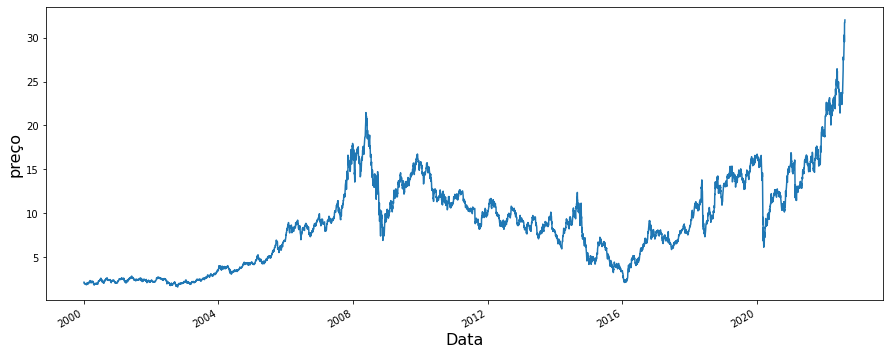

In [54]:
close.plot()
plt.xlabel('Data',size=16)
plt.ylabel('preço',size=16)
plt.show()

In [55]:
type(close) # tipo do dados da coluna close 

pandas.core.series.Series

In [56]:
df = pd.DataFrame(close) # transformando em Dataframe
type(df) 

pandas.core.frame.DataFrame

In [57]:
df.index # necessario resetar o index que nesse caso e a data. 

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-15', '2022-08-16'],
              dtype='datetime64[ns]', name='Date', length=5685, freq=None)

In [58]:
df.reset_index('Date',inplace=True)# Função implace pandas e para fixar a alteração no indece do Dataframe

In [86]:
df.columns = ['ds','y'] # Para trabalhar com o Profhet precisa que as colunas sejam (d e y)
df.head(10)
#df.dtypes

,ds,y
0,2000-01-03,2.139587
1,2000-01-04,2.021227
2,2000-01-05,2.000833
3,2000-01-06,1.993914
4,2000-01-07,2.003018
5,2000-01-10,2.044172
6,2000-01-11,1.993914
7,2000-01-12,1.996827
8,2000-01-13,1.939286
9,2000-01-14,1.966600


In [60]:
modelo =Prophet()
modelo.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [61]:
data_futuro = pd.date_range(start='2022-08-01', end= '2022-08-17') # fazendo uma previsao futura com um espaço de data usando a ultima leitura disponivel.

In [62]:
type(data_futuro)

pandas.core.indexes.datetimes.DatetimeIndex

In [63]:
df1=pd.DataFrame(data_futuro)

In [64]:
df1.columns = ['ds']

In [65]:
previsao = modelo.predict(df1)

c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [66]:
previsao.head(17)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-01,19.957041,17.609303,22.116835,19.957041,19.957041,0.095407,0.095407,0.095407,0.008576,0.008576,0.008576,0.086831,0.086831,0.086831,0.0,0.0,0.0,20.052448
1,2022-08-02,19.963688,17.892816,22.534797,19.963688,19.963688,0.098056,0.098056,0.098056,0.007152,0.007152,0.007152,0.090904,0.090904,0.090904,0.0,0.0,0.0,20.061744
2,2022-08-03,19.970335,17.866940,22.361552,19.970335,19.970335,0.105845,0.105845,0.105845,0.013238,0.013238,0.013238,0.092607,0.092607,0.092607,0.0,0.0,0.0,20.076180
3,2022-08-04,19.976982,17.831689,22.273272,19.976982,19.976982,0.106000,0.106000,0.106000,0.014142,0.014142,0.014142,0.091858,0.091858,0.091858,0.0,0.0,0.0,20.082983
4,2022-08-05,19.983630,17.824738,22.165994,19.983630,19.983630,0.089492,0.089492,0.089492,0.000877,0.000877,0.000877,0.088615,0.088615,0.088615,0.0,0.0,0.0,20.073121
5,2022-08-06,19.990277,17.792539,22.246456,19.990277,19.990277,0.060882,0.060882,0.060882,-0.021993,-0.021993,-0.021993,0.082875,0.082875,0.082875,0.0,0.0,0.0,20.051159
6,2022-08-07,19.996924,17.894241,22.304751,19.996924,19.996924,0.052683,0.052683,0.052683,-0.021993,-0.021993,-0.021993,0.074676,0.074676,0.074676,0.0,0.0,0.0,20.049607
7,2022-08-08,20.003571,17.726575,22.297034,20.003571,20.003571,0.072675,0.072675,0.072675,0.008576,0.008576,0.008576,0.064099,0.064099,0.064099,0.0,0.0,0.0,20.076246
8,2022-08-09,20.010218,17.914185,22.182430,20.010218,20.010218,0.058413,0.058413,0.058413,0.007152,0.007152,0.007152,0.051261,0.051261,0.051261,0.0,0.0,0.0,20.068632
9,2022-08-10,20.016866,17.967543,22.358594,20.016866,20.016866,0.049558,0.049558,0.049558,0.013238,0.013238,0.013238,0.036320,0.036320,0.036320,0.0,0.0,0.0,20.066423


In [67]:
previsao.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
12,2022-08-13,20.036807,17.805972,22.113763,20.036807,20.036807,-0.041058,-0.041058,-0.041058,-0.021993,-0.021993,-0.021993,-0.019066,-0.019066,-0.019066,0.0,0.0,0.0,19.995749
13,2022-08-14,20.043455,17.739991,22.017194,20.043455,20.043455,-0.062215,-0.062215,-0.062215,-0.021993,-0.021993,-0.021993,-0.040222,-0.040222,-0.040222,0.0,0.0,0.0,19.981240
14,2022-08-15,20.050102,17.682976,22.310882,20.050102,20.050102,-0.053682,-0.053682,-0.053682,0.008576,0.008576,0.008576,-0.062258,-0.062258,-0.062258,0.0,0.0,0.0,19.996420
15,2022-08-16,20.056749,17.761963,22.209894,20.056749,20.056749,-0.077720,-0.077720,-0.077720,0.007152,0.007152,0.007152,-0.084872,-0.084872,-0.084872,0.0,0.0,0.0,19.979029
16,2022-08-17,20.063396,17.778080,22.288771,20.063396,20.063396,-0.094519,-0.094519,-0.094519,0.013238,0.013238,0.013238,-0.107756,-0.107756,-0.107756,0.0,0.0,0.0,19.968878


In [68]:
previsao [['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-08-01,20.052448,17.609303,22.116835
1,2022-08-02,20.061744,17.892816,22.534797
2,2022-08-03,20.076180,17.866940,22.361552
3,2022-08-04,20.082983,17.831689,22.273272
4,2022-08-05,20.073121,17.824738,22.165994
5,2022-08-06,20.051159,17.792539,22.246456
6,2022-08-07,20.049607,17.894241,22.304751
7,2022-08-08,20.076246,17.726575,22.297034
8,2022-08-09,20.068632,17.914185,22.182430
9,2022-08-10,20.066423,17.967543,22.358594


<function matplotlib.pyplot.show(close=None, block=None)>

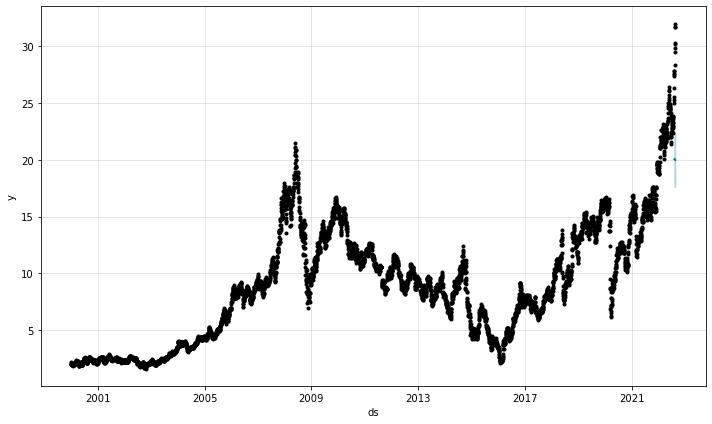

In [69]:
modelo.plot(previsao)
plt.show

c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



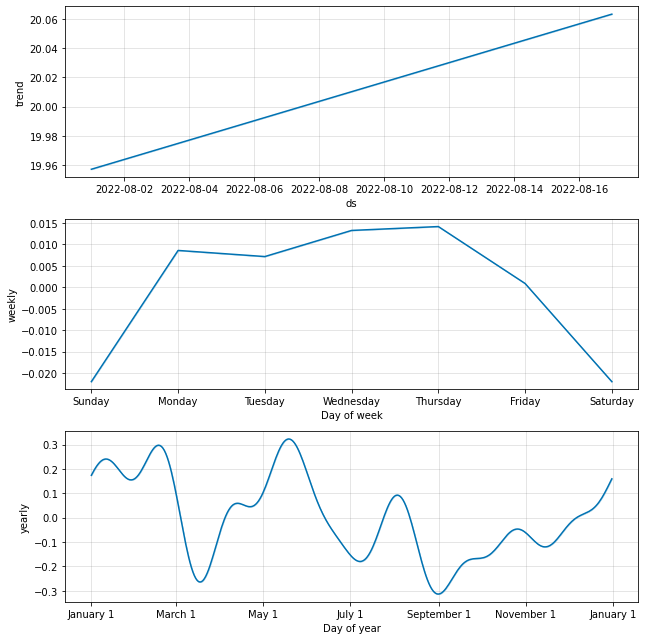

In [70]:
modelo.plot_components(previsao)
plt.show()

In [73]:
from prophet.plot import plot_plotly , plot_components_plotly

In [74]:
plot_plotly(modelo,previsao)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [76]:
df_treino , df_teste = train_test_split(df,test_size=0.15,shuffle=False)

In [77]:
df_teste

,ds,y
4832,2019-03-13,14.763633
4833,2019-03-14,14.810918
4834,2019-03-15,14.842442
4835,2019-03-18,15.099885
4836,2019-03-19,15.341569
...,...,...
5680,2022-08-10,30.218287
5681,2022-08-11,29.517998
5682,2022-08-12,31.709999
5683,2022-08-15,31.719999


In [78]:
df_treino

,ds,y
0,2000-01-03,2.139587
1,2000-01-04,2.021227
2,2000-01-05,2.000833
3,2000-01-06,1.993914
4,2000-01-07,2.003018
...,...,...
4827,2019-03-06,14.059601
4828,2019-03-07,14.064857
4829,2019-03-08,14.012313
4830,2019-03-11,14.579742


In [79]:
modelo2 = Prophet()


In [80]:
modelo2.fit(df_treino)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [38]:
previsao2 = modelo2.predict(pd.DataFrame(df_teste['ds']))

c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [81]:
previsao2.head(10)['yhat']

0    23.483550
1    23.465985
2    23.431481
3    23.449889
4    23.439291
5    23.481342
6    23.482016
7    23.466632
8    23.543148
9    23.550689
Name: yhat, dtype: float64

In [82]:
y_prev = previsao2['yhat'].values
y_true = df_teste['y'].values

In [83]:
mean_squared_error(y_prev,y_true)

217.6024410727164

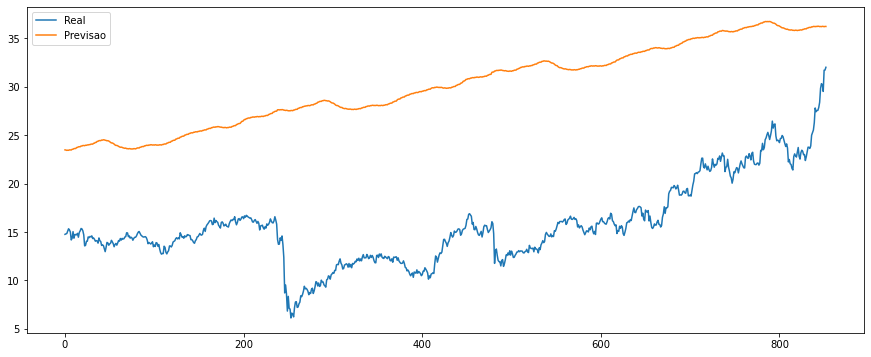

In [84]:
plt.plot(y_true , label = 'Real')
plt.plot(y_prev , label = 'Previsao')
plt.legend()